# windowsを想定しています

windows11でmujocoを使用し， 
   
・自分が物理演算させたいものを物理演算して，  
・その動いてる様子を可視化して，  
・ほしいデータを取り，分析したりなんなり  
  
して研究に使用することがみんな簡単にできるように目指した資料です．

インストール方法  
① 任意の環境で
pip install mujoco  
↑これで一応スクリプト上からは使えるが，可視化させながら作業できる便利ツールがあるのでそれ↓も入れていきます．

②windows版mujocoを公式サイト（https://github.com/google-deepmind/mujoco/releases）
からダウンロードし，解凍したファイルを以下に保存して，パスを通す．
C:user/(自分のユーザー名)/.mujoco/mujoco210/bin  
パスの通し方解説サイト：（https://atmarkit.itmedia.co.jp/ait/articles/1805/11/news035.html）  
これで準備完了
レンダリングに必要な「ffmpeg」も，ググって公式サイトからダウンロードして同じようにpathを通せば動きます．  
mediapyはpip install mediapyでok

## ！！重要事前知識！！
mujocoは，2021年くらいにgoogleのdeepmindに買収されるまでは有料ソフトでした．  
そして当時はmujoco(c++?)とmujoco-py(python)の２つに分かれていました.  
現在はmujocoとmujoco-pyは統合され，mujocoのpythonバインディングとしてmujoco内に用意されているので，  
mujocoを入れるだけでpythonでmujocoを使用することができます．  

上記のような経緯があるため，ネットでmujocoについて調べていると，買収前の当時の情報が出てきてしまいます．その情報の日付を確認するなど注意するようにしてください．

# 動作確認

""

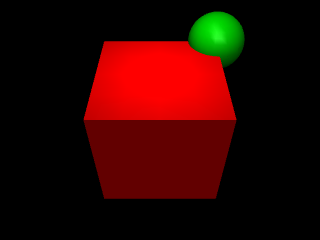

In [1]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [ ]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 3.8  # (seconds)
framerate = 60  # (Hz)

frames = []
mujoco.mj_resetData(model, data)
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video.
media.show_video(frames, fps=framerate)

# 楓君環境

In [ ]:
# import gymnasium as gym
# import numpy as np
# from tqdm import trange
# # from gym import wrappers

# ALPHA = 0.5 
# GAMMA = 0.99 # 割引率
# EPSILON = 0.02 # ε-greedy法のε

# num_epospdes = 1000
# max_step = 1000

# env = gym.make('InvertedPendulum-v4', render_mode="human")
# observation, info = env.reset()


# for _ in trange(500): #iとかの繰り返しカウント変数を用意しない書き方
#     action = env.action_space.sample()  # agent policy that uses the observation and info
#     observation, reward, terminated, truncated, info = env.step(action)

#     if terminated or truncated:
#         observation, info = env.reset()

# env.close()



# first_step ブロックを落としてデータを取ってみる

""

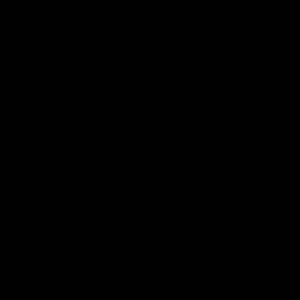

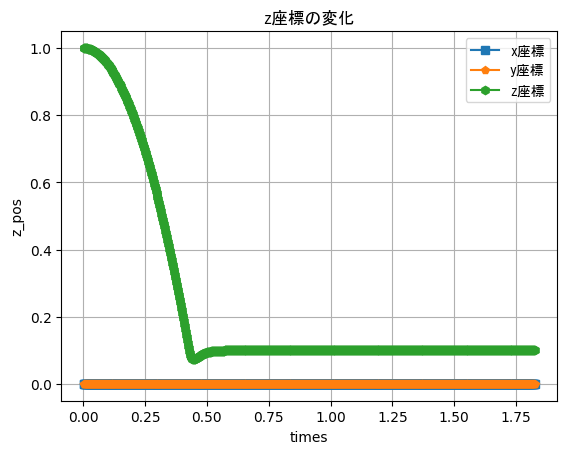

In [2]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3" mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <camera name="fixed" pos="0 -1.6 .8" xyaxes="1 0 0 0 1 2"/>
    </body>
    <site type="box" rgba="1 0 0 1" fromto="0 0 0 2 0 0" />
    <site type="box" rgba="0 1 0 1" fromto="0 0 0 0 2 0" />
    <site type="box" rgba="0 0 1 1" fromto="0 0 0 0 0 2" />
  </worldbody>
</mujoco>
"""
cube_xpos = []
cube_ypos = []
cube_zpos = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube_xpos.append(data.qpos[0].copy())
    cube_ypos.append(data.qpos[1].copy())
    cube_zpos.append(data.qpos[2].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

plt.xlabel("times")
plt.ylabel("z_pos")
plt.grid()
plt.title("z座標の変化", fontname="MS Gothic")
plt.plot(times, cube_xpos, linestyle='solid', marker='s', label="x座標")
plt.plot(times, cube_ypos, linestyle='solid', marker='p', label="y座標")
plt.plot(times, cube_zpos, linestyle='solid', marker='h', label="z座標")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

data.qposとdata.geom_xposを比較する実験↓

""

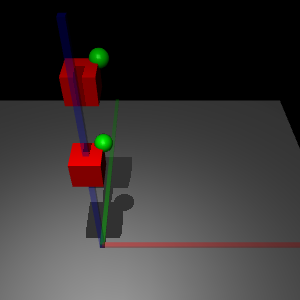

qpos= [ 1.87364471e-02 -3.45874662e-02  9.98923328e-02  9.95565525e-01
 -5.80250171e-05  4.80061706e-05  9.40706068e-02 -2.28484582e-01
  8.13726794e-01  9.98923319e-02 -7.07058626e-01 -7.07133515e-01
 -3.92937116e-03 -3.85364938e-03]
geom_xpos= [[ 0.          0.          0.        ]
 [ 0.01873645 -0.03458747  0.09989233]
 [ 0.09824437  0.08238582  0.19987103]
 [-0.22848458  0.81372679  0.09989233]
 [-0.12737921  0.71482299  0.19987103]]


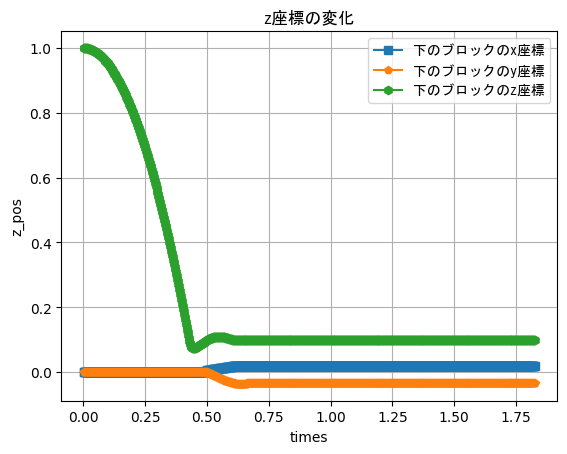

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3" mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube_xpos = []
cube_ypos = []
cube_zpos = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube_xpos.append(data.qpos[0].copy())
    cube_ypos.append(data.qpos[1].copy())
    cube_zpos.append(data.qpos[2].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qpos=", data.qpos)
print("geom_xpos=", data.geom_xpos)

plt.xlabel("times")
plt.ylabel("z_pos")
plt.grid()
plt.title("z座標の変化", fontname="MS Gothic")
plt.plot(times, cube_xpos, linestyle='solid', marker='s', label="下のブロックのx座標")
plt.plot(times, cube_ypos, linestyle='solid', marker='p', label="下のブロックのy座標")
plt.plot(times, cube_zpos, linestyle='solid', marker='h', label="下のブロックのz座標")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

比較の結果，data.qposは一次元ですべてのgeomの位置座標データを格納していて，qposの持っている7つのデータ（前３つが位置座標，後ろ４つがクオータニオンでの方向情報）であることが分かった．

そしてdata.geom_xposは，各geomごとの座標情報のみを，２次元のリストで格納していた．よって，geom_xposのほうが使いやすそう　物体の向きとか細かく見たいときはqposの出番というイメージを持った

## 2つの物体の位置座標を比較するグラフを作成するプログラムを書いてみる

""

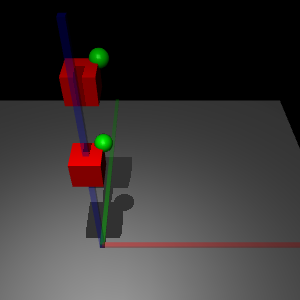

qpos= [ 1.87364471e-02 -3.45874662e-02  9.98923328e-02  9.95565525e-01
 -5.80250171e-05  4.80061706e-05  9.40706068e-02 -2.28484582e-01
  8.13726794e-01  9.98923319e-02 -7.07058626e-01 -7.07133515e-01
 -3.92937116e-03 -3.85364938e-03]
geom_xpos= [[ 0.          0.          0.        ]
 [ 0.01873645 -0.03458747  0.09989233]
 [ 0.09824437  0.08238582  0.19987103]
 [-0.22848458  0.81372679  0.09989233]
 [-0.12737921  0.71482299  0.19987103]]


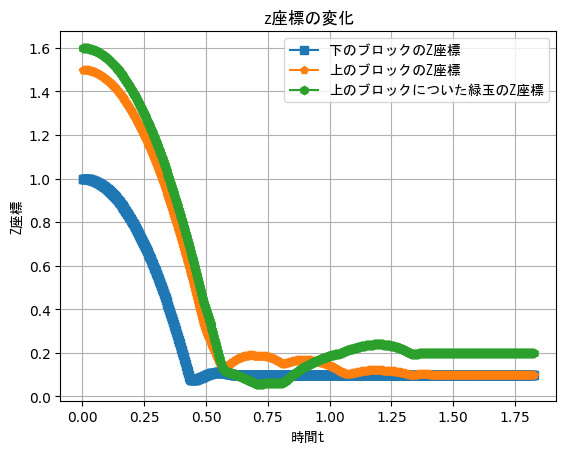

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"  mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube1_zpos = []
cube2_zpos = []
cube2_greenball_zpos = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zpos.append(data.geom_xpos[1][2].copy())
    cube2_zpos.append(data.geom_xpos[3][2].copy())
    cube2_greenball_zpos.append(data.geom_xpos[4][2].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qpos=", data.qpos)
print("geom_xpos=", data.geom_xpos)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z座標", fontname="MS Gothic")
plt.grid()
plt.title("z座標の変化", fontname="MS Gothic")
plt.plot(times, cube1_zpos, linestyle='solid', marker='s', label="下のブロックのZ座標")
plt.plot(times, cube2_zpos, linestyle='solid', marker='p', label="上のブロックのZ座標")
plt.plot(times, cube2_greenball_zpos, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ座標")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

続いて，速度を取得してみる  
速度は，data.qposではなくdata.qvelから取得する．（疑問：速度qvelもposと同じように，data.geom_xposのようなものつまりdata.geom_xvel的なのがあるのだろうか 回答：ありませんでした）

""

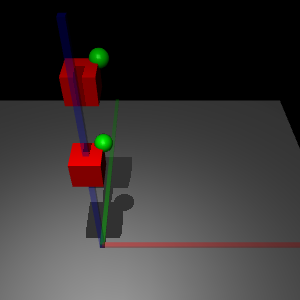

qvel= [ 7.90231483e-18  9.89103595e-17  2.09325985e-15 -9.55075001e-16
  2.65299935e-16  4.23019921e-19  4.48889953e-09 -2.51502243e-08
  3.22513849e-08  2.44765773e-07 -5.50598968e-10 -4.10285648e-08]


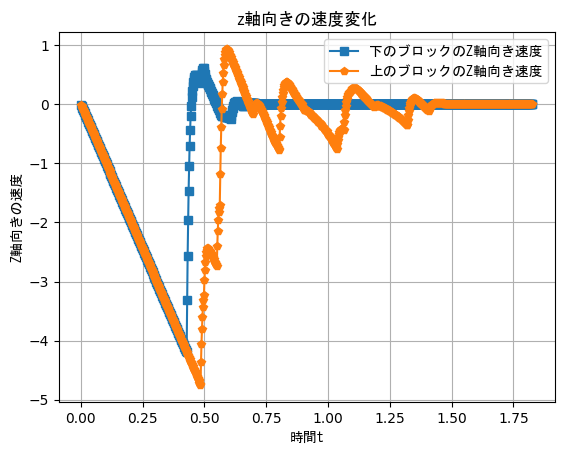

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube1_zvel = []
cube2_zvel = []
cube2_greenball_zvel = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
model.body_pos = [[0,0,0],[10,0,1], [0,0.2,1.5]]
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zvel.append(data.qvel[2].copy())
    cube2_zvel.append(data.qvel[8].copy())
    # cube2_greenball_zvel.append(data.[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qvel=", data.qvel)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z軸向きの速度", fontname="MS Gothic")
plt.grid()
plt.title("Z軸向きの速度変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き速度")
plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度(相対?)")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

In [3]:
dir(data)

['B_colind',
 'B_rowadr',
 'B_rownnz',
 'D_colind',
 'D_rowadr',
 'D_rownnz',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_address',
 'act',
 'act_dot',
 'actuator',
 'actuator_force',
 'actuator_length',
 'actuator_moment',
 'actuator_velocity',
 'body',
 'bvh_active',
 'cacc',
 'cam',
 'cam_xmat',
 'cam_xpos',
 'camera',
 'cdof',
 'cdof_dot',
 'cfrc_ext',
 'cfrc_int',
 'cinert',
 'contact',
 'crb',
 'ctrl',
 'cvel',
 'efc_AR',
 'efc_AR_colind',
 'efc_AR_rowadr',
 'efc_AR_rownnz',
 'efc_D',
 'efc_J',
 'efc_JT',
 'efc_JT_colind',
 'efc_JT_rowadr',
 'efc_JT_rownnz',
 'efc_JT_rowsuper',
 'efc_J_colind',
 'efc_J_rowadr',
 'efc_J_row

疑問：赤い箱と緑の玉をくっつけた物体を一つの物体とみなして，その物体の速度を取っている．これの，それぞれの物体の速度を取得することはできないのか  
mj_kinematicsを使って，そういう相対的な位置座標になってるやつの絶対座標を取っているのがチュートリアルにあったから，それの速度版もあるはず？なので要確認

### 速度と角速度取得ver.  
(geomごとにそれぞれ持っているqvelの６つの値のうち，後ろ３つの値が角速度になっているのでそれを取り出してグラフにした)

""

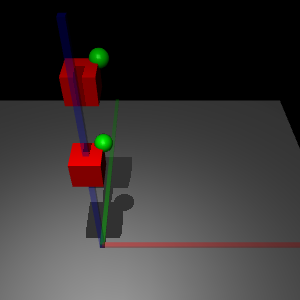

qvel= [ 7.90231483e-18  9.89103595e-17  2.09325985e-15 -9.55075001e-16
  2.65299935e-16  4.23019921e-19  4.48889953e-09 -2.51502243e-08
  3.22513849e-08  2.44765773e-07 -5.50598968e-10 -4.10285648e-08]


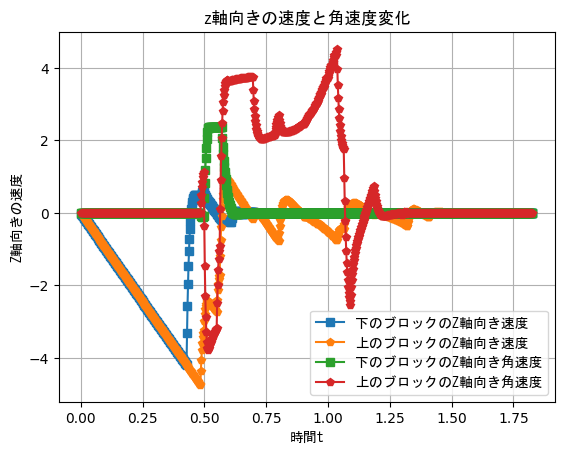

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube1_zvel = []
cube2_zvel = []
cube2_greenball_zvel = []
cube1_z_angvel = []
cube2_z_angvel = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zvel.append(data.qvel[2].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
    cube2_zvel.append(data.qvel[8].copy()) #qvelの値は連なっているので，2個目のgeomの0,1,2番目の値つまり6,7,8番目の値がZ軸速度である．それを取り出してリストに保存
    # cube2_greenball_zvel.append(data.qvel[5].copy())
    cube1_z_angvel.append(data.qvel[5].copy())
    cube2_z_angvel.append(data.qvel[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qvel=", data.qvel)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z軸向きの速度", fontname="MS Gothic")
plt.grid()
plt.title("z軸向きの速度と角速度変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き速度")
plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

### 速度と加速度ver.
加速度を取る方法は，２通りある．  
①xmlに書いてセンサーを取り付けて，その値を取得する方法  
②data.qaccから値を取得する方法  
  
今回は，②の方法を試す．（①も別に難しくないですむしろ簡単なはず）

In [8]:
# dir(data) で色々機能が見れる
data.qacc

array([ 4.68572684e-15, -3.17355031e-15, -2.17305340e-17,  4.30132119e-14,
        4.28851956e-14,  5.24920768e-16, -1.54751679e-07,  9.27145380e-07,
       -1.16571714e-06, -9.02184841e-06,  2.05762163e-08,  1.40822341e-06])

data.qaccはqvelと同じように，１つのgeomあたり６つの値を持つ．最初の3つの値は加速度で，後ろ３つの値は角加速度である．
試しに下で加速度を表示させてみる．

""

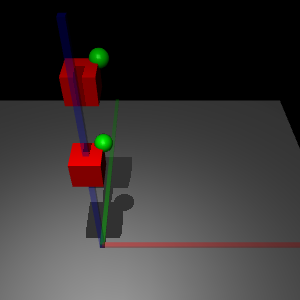

qacc= [ 4.68572684e-15 -3.17355031e-15 -2.17305340e-17  4.30132119e-14
  4.28851956e-14  5.24920768e-16 -1.54751679e-07  9.27145380e-07
 -1.16571714e-06 -9.02184841e-06  2.05762163e-08  1.40822341e-06]


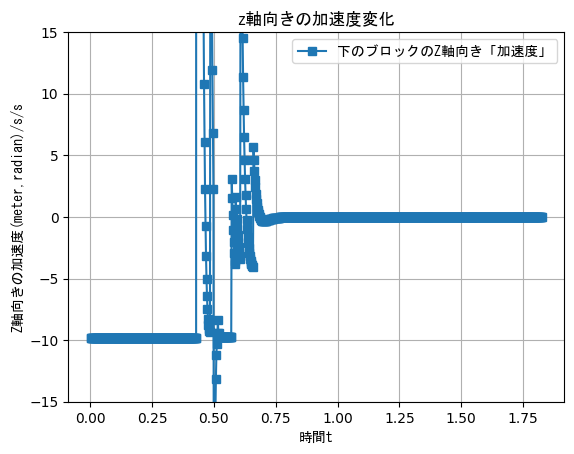

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube1_zvel = []
cube2_zvel = []
cube2_greenball_zvel = []
cube1_z_angvel = []
cube2_z_angvel = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zvel.append(data.qacc[2].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
    cube2_zvel.append(data.qacc[8].copy()) #qvelの値は連なっているので，2個目のgeomの0,1,2番目の値つまり6,7,8番目の値がZ軸速度である．それを取り出してリストに保存
    # cube2_greenball_zvel.append(data.qacc[5].copy())
    cube1_z_angvel.append(data.qacc[2].copy())
    cube2_z_angvel.append(data.qacc[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qacc=", data.qacc)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z軸向きの加速度(meter,radian)/s/s", fontname="MS Gothic")
plt.grid()
plt.title("z軸向きの加速度変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き「加速度」")
plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き「加速度」")
plt.ylim(-15,15)
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
# plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
# plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

### ちなみに①のセンサを取り付けてその値を取得するやり方でもやってみる．（めっちゃ簡単にできるよ！）
  
まず,センサーを付けたいbodyのとこに，＜/body＞で閉じるんじゃなくて，＜site name="IMU"/＞とか書いておく．  
そしたらworldbodyの下に，＜sensor＞を書く．そしてその中でセンサの種類と，名前と，どこにつけるかを書く．  
例：  
  ＜sensor>  
    　　＜accelerometer name="accelerometer" site="IMU"/>  
  ＜/sensor>  

""

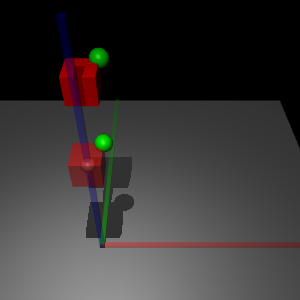

qacc= [ 4.68572684e-15 -3.17355031e-15 -2.17305340e-17  4.30132119e-14
  4.28851956e-14  5.24920768e-16 -1.54751679e-07  9.27145380e-07
 -1.16571714e-06 -9.02184841e-06  2.05762163e-08  1.40822341e-06]


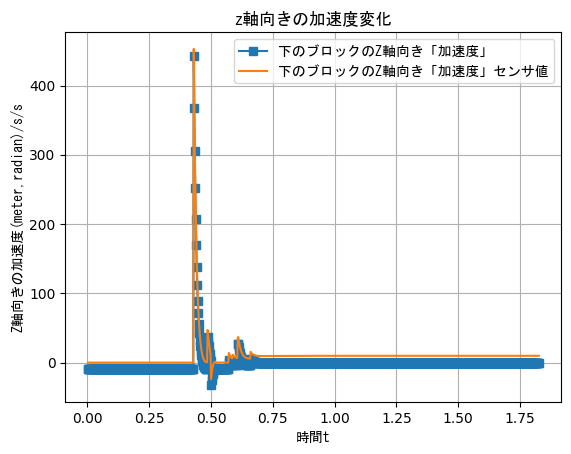

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 0.3"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <site name="IMU" size="0.05"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>

  <sensor>
    <accelerometer name="accelerometer" site="IMU"/>
  </sensor>
</mujoco>
"""
cube1_zvel = []
cube2_zvel = []
cube2_greenball_zvel = []
cube1_z_angvel = []
cube2_z_angvel = []
acc_sensordata = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zvel.append(data.qacc[2].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
    cube2_zvel.append(data.qacc[8].copy()) #qvelの値は連なっているので，2個目のgeomの0,1,2番目の値つまり6,7,8番目の値がZ軸速度である．それを取り出してリストに保存
    acc_sensordata.append(data.sensordata[2].copy()) 
    # cube2_greenball_zvel.append(data.qacc[5].copy())
    cube1_z_angvel.append(data.qacc[2].copy())
    cube2_z_angvel.append(data.qacc[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qacc=", data.qacc)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z軸向きの加速度(meter,radian)/s/s", fontname="MS Gothic")
plt.grid()
plt.title("z軸向きの加速度変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き「加速度」")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き「加速度」")
plt.plot(times, acc_sensordata, linestyle='solid', label="下のブロックのZ軸向き「加速度」センサ値")
# plt.ylim(-15,15)
# plt.plot(times, , linestyle='solid', marker='h', label="センサデータ")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
# plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
# plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

同じ情報を取っているように見えるけど，センサ値は全体的に上にずれているように見えるので拡大して見てみる（y軸の範囲をplt.ylim(底,上限)で指定するだけ）

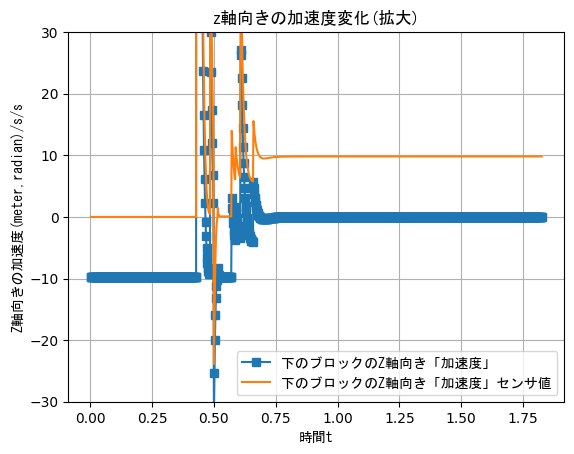

In [4]:
plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("Z軸向きの加速度(meter,radian)/s/s", fontname="MS Gothic")
plt.grid()
plt.title("z軸向きの加速度変化(拡大)", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き「加速度」")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き「加速度」")
plt.plot(times, acc_sensordata, linestyle='solid', label="下のブロックのZ軸向き「加速度」センサ値")
plt.ylim(-30,30)
# plt.plot(times, , linestyle='solid', marker='h', label="センサデータ")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
# plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
# plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

やっぱりずれてる！初期値が０になっている・・自由落下時なのに加速度０，そして地面についた後はずっと加速度10ってなってる・・加速度10ってことは常に速度が上がっているってことじゃないか！！やっぱり初期の値を０とするようになってるのかな

# これで,mujocoで位置・(角)速度・(角)加速度の取り方が分かった．あとはプログラムからモデルを動かす方法がわかればいろいろできるようになる

In [2]:
mujoco.Renderer

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'disable_depth_rendering',
 'disable_segmentation_rendering',
 'enable_depth_rendering',
 'enable_segmentation_rendering',
 'height',
 'model',
 'render',
 'scene',
 'update_scene',
 'width']

# mujocoのjointタグにつけられる，dampingの値は，ダンパの速度に比例してかかる力の係数（減衰係数）であることが確認できました．また，stiffnessはばね定数を表しており，springlefは現在の物体の位置から(ジョイントの定義した位置から)どのくらい離れた場所に釣り合いの位置があるかを意味する値．

# MuJoCoの描画攻略

In [22]:
import time

import mujoco
import mujoco.viewer
import numpy as np
# import mujoco
# import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 0.3"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <site name="IMU" size="0.05"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>

  <sensor>
    <accelerometer name="accelerometer" site="IMU"/>
  </sensor>
</mujoco>
"""

m = mujoco.MjModel.from_xml_string(xml)
d = mujoco.MjData(m)
stepcount = 0

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動
  # 30秒後に自動的にビューアを閉じる。mujoco viewer.launch_passiveはopenfile関数的な感じで，これを実行するとビューアが出る！
  start = time.time() #スタート時間計測

  while viewer.is_running() and time.time() - start < 30:
    step_start = time.time()

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    mujoco.mj_step(m, d)
    stepcount += 1

    # ビューアのオプションの例: 2秒ごとに接触点を切り替える。
    # with viewer.lock():
    #   viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_CONTACTPOINT] = int(d.time % 2)
    if (stepcount % 150 == 0):{
    # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
    viewer.sync()}

    # 基本的な時間の計測、壁時計に対してドリフトします。
    time_until_next_step = m.opt.timestep - (time.time() - step_start)
    if time_until_next_step > 0:
      time.sleep(0.0001)


In [20]:
dir(viewer.opt)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'actuatorgroup',
 'bvh_depth',
 'flags',
 'frame',
 'geomgroup',
 'jointgroup',
 'label',
 'sitegroup',
 'skingroup',
 'tendongroup']

## 描画最小構成(いまはカメラ設定調査中により工事中)

In [8]:
import time
import mujoco
import mujoco.viewer
import numpy as np
import matplotlib.pyplot as plt

xml = """
<mujoco>
    <default>
        <camera mode="track"/>
    </default>

    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.0001" />
    <!-- <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100" />
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom"
            random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127" />
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8"
            type="2d" width="100"/>
        <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60"
            texture="texplane"/>
        <material name="geom" texture="texgeom" texuniform="true" />
    </asset> -->

    <asset>
    <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="3072"/>
    <texture type="2d" name="groundplane" builtin="checker" mark="edge" rgb1="0.2 0.3 0.4" rgb2="0.1 0.2 0.3"
      markrgb="0.8 0.8 0.8" width="300" height="300"/>
    <material name="groundplane" texture="groundplane" texuniform="true" texrepeat="5 5" reflectance="0.2"/>
    </asset>

    

    <worldbody>

        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <!-- <geom conaffinity="1" condim="3" name="floor" friction="0.0 0.0 0.0" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="10 10 10" type="plane"/> -->
        <geom type="plane" size="30 30 .01" material="groundplane"/>
      <light pos="0 0 1.5" dir="0 0 -1" directional="true"/>
      <!-- <body name="camera_body">
      <camera name="camera_name" mode="targetbody" target="torso" pos="0 0 2" xyaxes="1 0 0 0 1 0" fovy="45" resolution="1 1"/> 空間固定，追従カメラ作成
      
            </body> -->




        <body pos="0 0 1.8e-3">
            <freejoint />
            <body name="torso" >
            <geom name="mein_body1" type="box" size="0.05 0.03 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0 0 0.001" />
            <geom name="mein_body_chip1" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.04 0.03 0.001" euler="0 0 45" />
            <geom name="mein_body_chip2" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.04 -0.03 0.001" euler="0 0 45" />
            <geom name="mein_body_chip3" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.04 0.03 0.001" euler="0 0 45" />
            <geom name="mein_body_chip4" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.04 -0.03 0.001" euler="0 0 45" />
            <geom name="mein_body4" type="box" size="0.013 0.04 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.027 0 0.001"/>
            <geom name="mein_body5" type="box" size="0.013 0.04 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.027 0 0.001"/>
                <site name = "hit_box" type = "box" size = "0.02 0.05 0.0016" pos="0.04 0 0.003" rgba=".5 .2 0 .3"/>
                <site name = "hit_box2" type = "box" size = "0.02 0.05 0.0016" pos="-0.04 0 0.003" rgba=".5 .2 0 .3"/>
                <camera name="camera_name" mode="track" pos="-0.2 0 1" euler="0 -20 -90" fovy="60"/> トラッキングカメラを装着
            </body>
            
            <site name="sensor_left_front" type="box" size="0.003 0.003 0.003" pos="0.031 0.036 0.01" zaxis="1 0 0.01" rgba=".5 1 .5 1"/>
              <!-- zaxisの３つめ　0.1でちょい上向き -->
            <site name="sensor_left_side" type="box" size="0.003 0.003 0.003" pos="0.043 0.016 0.01" zaxis="0.25 1 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_front" type="box" size="0.003 0.003 0.003" pos="0.031 -0.036 0.01" zaxis="1 0 0.01" rgba=".5 1 .5 1"/>
            <site name="sensor_right_side" type="box" size="0.003 0.003 0.003" pos="0.043 -0.016 0.01" zaxis="0.25 -1 0" rgba=".5 1 .5 1"/>
            <!-- <site name = "hit_box" type = "box" size = "0.02 0.05 0.0005" pos="0.04 0 0.002" rgba=".5 .2 0 .3"/>
            <site name = "hit_box2" type = "box" size = "0.02 0.05 0.0005" pos="-0.04 0 0.002" rgba=".5 .2 0 .3"/> -->

            <!-- <body name="left wheel" pos="-0.0 0.036 0.0117" zaxis="0 1 0"> -->
             <body name="left wheel" pos="-0.0 0.036 0.0125" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" damping='3.6e-6' />
                
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" mass="0.512"/>
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>
            


            <body name="right wheel" pos="-0.0 -0.036 0.0125" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" damping='3.6e-6' />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" mass="0.512"/>
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="motorbox1" pos="0 -0.018 0.0135" >
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

            <body name="motorbox2" pos="0 0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

        </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.01"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.01"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.01"/>



        <!-- <body name="wall" pos="7 0.0 0">
                <geom type="box" size="0.1 2 0.3" rgba=".5 .5 1 1" />
            </body> -->

        <body name="maze_wall2ss" pos="-0.09 0 0.025">
                <geom type="box" size="0.005 0.18 0.025" rgba=".5 .5 1 1" />
            </body>
<!-- 
        <body name="side_wall1" pos="0 3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="side_wall2" pos="0 -3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="maze_init_wall_outline" pos="0 0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" pos="0 -0.18 0.0"/>
          
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.18 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.36 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.54 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.72 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.90 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.08 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.26 0 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="0.81 -0.72 0"/>

                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" />
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.0 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.18 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.36 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.54 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.72 -0.90 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 .3 0.5" pos="-0.09 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="-0.09 -0.72 0"/>
            </body> -->



<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->

        <!-- <body name="maze_wall2" pos="1.9 -0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="long_wall2" pos="1.9 0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body> -->
<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->
            

            <!-- <body name="goal1" pos="2 0 0.045">
                <geom name="goal" type="sphere" size="0.03" rgba="1 1 0 1" />
                <site name="goal" type="sphere" size="0.1" rgba="0 1 0.2 0.2" />
            </body> -->
     




    </worldbody>
    <actuator>
        <motor name="right" joint="right wheel joint" gear="1.8e-3"/>
        <motor name="left" joint="left wheel joint" gear="1.8e-3"/>
    </actuator>

    <sensor>
        <rangefinder name="LF" site="sensor_left_front" cutoff="0.10"/>
        <rangefinder name="LS" site="sensor_left_side" cutoff="0.10"/>
        <rangefinder name="RF" site="sensor_right_front" cutoff="0.10"/>
        <rangefinder name="RS" site="sensor_right_side" cutoff="0.10"/>
        <touch name = "HB" site = "hit_box"/>
        <touch name = "HB2" site = "hit_box2"/>
    </sensor>
</mujoco>
"""

m = mujoco.MjModel.from_xml_string(xml) #modelを読み込んで用意
d = mujoco.MjData(m) #モデルのデータを用意
print("初期cam_mode:",m.cam_mode)
mujoco.viewer.mujoco.mjtCamLight = 3

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動
    d.ctrl = 3,3 #ctrl
    mujoco.mj_step(m, d) #シミュレーションを1ステップ進める
    viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
    time.sleep(2)

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    for i in range(500000):
      d.ctrl = 3,3 #ctrl
    #   time.sleep(0.1)
      mujoco.mj_step(m, d) #シミュレーションを1ステップ進める
    #   print(m.cam_mode)
      viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する


    # 基本的な時間の計測、壁時計に対してドリフトします。
    # time_until_next_step = m.opt.timestep - (time.time() - step_start)
    # if time_until_next_step > 0:
    #   time.sleep(0.0001)


初期cam_mode: [1]


In [6]:
print(m.cam_mode)
# print(mujoco.viewer.mujoco.mjtCamLight.mjCAMLIGHT_TRACK)
dir(mujoco.mjtCamLight)

[1]


['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

## カメラ追従

In [1]:
import time
import mujoco
import mujoco.viewer
import numpy as np
import matplotlib.pyplot as plt

xml = """
<mujoco>
    <default>
        <!-- <joint damping=".03" actuatorforcerange="-0.5 0.5"/> -->
        <default class="wheel">
            <geom type="cylinder" size=".03 .01" rgba=".5 .5 1 1" />
        </default>
    </default>

    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.01" />
    <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100" />
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom"
            random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127" />
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8"
            type="2d" width="100" />
        <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60"
            texture="texplane" />
        <material name="geom" texture="texgeom" texuniform="true" />
    </asset>

    <worldbody>
        <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1"
            pos="0 0 1.3" specular=".1 .1 .1" />
        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="40 40 40" type="plane"/>


        <body pos="0 0 .08">
            <freejoint />
            <camera name="camera" mode="track" pos="0 -3 0.3" xyaxes="1 0 0 0 0 1"/>
            <geom name="red_box" type="cylinder" size=".16 .040 " rgba="0.1 0.1 0.1 .5" pos="0 0 0" />

            <body name="left wheel" pos="-0.04 .13 -.02" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size=".036 .01" rgba=".5 .5 1 1" />
                <site type="box" rgba="1 1 1 1" size=".006 .036 .012" />
            </body>

            <body name="right wheel" pos="-0.04 -.13 -.02" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size=".036 .01" rgba=".5 .5 1 1" />
                <site type="box" rgba="1 1 1 1" size=".006 .036 .012" />
            </body>

            <body name="flont_ball" pos=".13 0 -.035">
                <joint type="ball" limited="false" />
                <geom type="sphere" size=".02" rgba=".8 .8 0 1" />
                <site type="box" rgba="1 0 0 1" size=".006 .02 .006" />
            </body>
        </body>
    </worldbody>
    <actuator>
        <motor name="right" joint="right wheel joint" />
        <motor name="left" joint="left wheel joint" />
        <!-- <motor name="right" joint="right wheel joint" ctrllimited="true" ctrlrange="-1.0 1.0" gear="2"/>
        <motor name="left" joint="left wheel joint" ctrllimited="true" ctrlrange="-1.0 1.0" gear="2"/> -->
    </actuator>
</mujoco>

"""

m = mujoco.MjModel.from_xml_string(xml) #modelを読み込んで用意
d = mujoco.MjData(m) #モデルのデータを用意

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    for i in range(200000):
      d.ctrl = 0.0000001,0.0000003 #ctrl
      m.cam_pos = d.geom_xpos[1]
      mujoco.mj_step(m, d) #モデルのデータを用意
      viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する


    # 基本的な時間の計測、壁時計に対してドリフトします。
    # time_until_next_step = m.opt.timestep - (time.time() - step_start)
    # if time_until_next_step > 0:
    #   time.sleep(0.0001)


### なぜうまくいかない！！！！カメラの座標のデータに物体の座標データを入れてるのに反応しない！！

# マイクロマウス
### まずは召喚

In [3]:
import time
import mujoco
import mujoco.viewer
import numpy as np
import matplotlib.pyplot as plt

xml = """
<mujoco>
    <default>
        <!-- <joint damping=".03" actuatorforcerange="-0.5 0.5"/> -->
        <default class="wheel">
            <geom type="cylinder" size=".0027 .0007" rgba=".5 .5 1 1" />
        </default>
    </default>

    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.01" />
    <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100" />
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom"
            random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127" />
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8"
            type="2d" width="100" />
        <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60"
            texture="texplane" />
        <material name="geom" texture="texgeom" texuniform="true" />
    </asset>

    <worldbody>
        <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1"
            pos="0 0 1.3" specular=".1 .1 .1" />
        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <geom conaffinity="1" condim="3" material="MatPlane" name="floor" friction="0.0 0.0 0.0" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="40 40 40" type="plane"/>


        <body pos="0 0 .08">
            <freejoint />
            <geom name="mein_body" type="box" size="0.05 0.04 0.0005" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 .7" pos="0 0 0.001" />
            <site name="sensor_left_front" type="box" size="0.003 0.003 0.003" pos="0.031 0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_left_side" type="box" size="0.003 0.003 0.003" pos="0.043 0.016 0.004" zaxis="0.2 1 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_front" type="box" size="0.003 0.003 0.003" pos="0.031 -0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_side" type="box" size="0.003 0.003 0.003" pos="0.043 -0.016 0.004" zaxis="0.2 -1 0" rgba=".5 1 .5 1"/>


            <body name="left wheel" pos="-0.0 0.036 0.0135" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="right wheel" pos="-0.0 -0.036 0.0135" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="motorbox1" pos="0 -0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

            <body name="motorbox2" pos="0 0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

        </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>



        <body name="wall" pos="3 0.0 2">
        <freejoint />
                <geom type="box" size="0.1 2 0.3" rgba=".5 .5 1 1" />
            </body>

        <body name="side_wall1" pos="0 3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body>

        <body name="side_wall2" pos="0 -3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body>

    </worldbody>
    <actuator>
        <motor name="right" joint="right wheel joint" gear="0.0008"/>
        <motor name="left" joint="left wheel joint" gear="0.0008" />
    </actuator>

    <sensor>
        <rangefinder name="LF" site="sensor_left_front"/>
        <rangefinder name="LS" site="sensor_left_side"/>
        <rangefinder name="RF" site="sensor_right_front"/>
        <rangefinder name="RS" site="sensor_right_side"/>
    </sensor>
</mujoco>
"""

m = mujoco.MjModel.from_xml_string(xml) #modelを読み込んで用意
d = mujoco.MjData(m) #モデルのデータを用意

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    for i in range(20000):
      d.ctrl = 0.000002,0.00008 #ctrl
      m.cam_pos = d.geom_xpos[1]
      mujoco.mj_step(m, d) #モデルのデータを用意
      viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する


    # 基本的な時間の計測、壁時計に対してドリフトします。
    # time_until_next_step = m.opt.timestep - (time.time() - step_start)
    # if time_until_next_step > 0:
    #   time.sleep(0.0001)


## マイクロマウスの各データを取得する
センサーデータ４つ，タイヤの回転速度２つ

[0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 1000/1000 [00:00<00:00, 7682.90it/s]


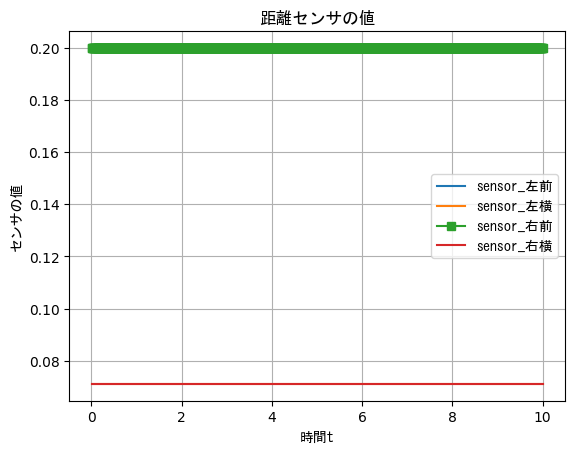

In [4]:
import time
import mujoco
import mujoco.viewer
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

xml = """
<mujoco>
    <default>
        <!-- <joint damping=".03" actuatorforcerange="-0.5 0.5"/> -->
        <default class="wheel">
            <geom type="cylinder" size=".0027 .0007" rgba=".5 .5 1 1" />
        </default>
    </default>

    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.01" />
    <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100" />
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom"
            random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127" />
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8"
            type="2d" width="100" />
        <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60"
            texture="texplane" />
        <material name="geom" texture="texgeom" texuniform="true" />
    </asset>

    <worldbody>
        
        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <geom conaffinity="1" condim="3" name="floor" friction="0.0 0.0 0.0" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="40 40 40" type="plane"/>


        <body pos="0 0 .08">
            <freejoint />
            <geom name="mein_body" type="box" size="0.05 0.04 0.0005" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 .7" pos="0 0 0.001" />
            <site name="sensor_left_front" type="box" size="0.003 0.003 0.003" pos="0.031 0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_left_side" type="box" size="0.003 0.003 0.003" pos="0.043 0.016 0.004" zaxis="0.25 1 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_front" type="box" size="0.003 0.003 0.003" pos="0.031 -0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_side" type="box" size="0.003 0.003 0.003" pos="0.043 -0.016 0.004" zaxis="0.25 -1 0" rgba=".5 1 .5 1"/>


            <body name="left wheel" pos="-0.0 0.036 0.0135" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="right wheel" pos="-0.0 -0.036 0.0135" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="motorbox1" pos="0 -0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

            <body name="motorbox2" pos="0 0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

        </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>



        <body name="wall" pos="3 0.0 2">
        <freejoint />
                <geom type="box" size="0.1 2 0.3" rgba=".5 .5 1 1" />
            </body>

        <body name="side_wall1" pos="0 3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body>

        <body name="side_wall2" pos="0 -3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body>

        <body name="maze_init_wall_outline" pos="0 0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" pos="0 -0.18 0.0"/>
                <!-- <geom type="box" size="0.09 0.005 0.025" rgba="1 1 1 1" /> -->
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.18 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.36 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.54 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.72 0 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="0.81 -0.72 0"/>

                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" />
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.0 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.18 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.36 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.54 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.72 -0.90 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 .3 0.5" pos="-0.09 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="-0.09 -0.72 0"/>
            </body>
            


        <!-- <body name="maze_wall1" pos="0 -0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" pos="0 -0.09 0.025" rgba=".5 .5 1 1" />
            </body> -->

        <body name="maze_wall2" pos="0.18 -0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>

            <body name="maze_wall3" pos="0.54 -0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall4" pos="0.54 -0.27 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall5" pos="0.36 -0.27 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall6" pos="0.54 -0.45 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall7" pos="0.36 -0.45 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall8" pos="0.27 -0.36 0.025">
                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall9" pos="0.09 -0.36 0.025">
                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall10" pos="0.09 -0.54 0.025">
                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall11" pos="0.00 -0.45 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall12" pos="0.18 -0.63 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall13" pos="0.36 -0.63 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
             <body name="maze_wall14" pos="0.63 -0.72 0.025">
                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="maze_wall15" pos="0.45 -0.18 0.025">
                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 1 1" />
            </body>


            <body name="Goal" pos="0.365 -0.365 0.045">
                <geom name="goal" type="sphere" size="0.02" rgba="1 1 0 0.6" />
            </body>



    </worldbody>
    <actuator>
        <motor name="right" joint="right wheel joint" gear="0.0008"/>
        <motor name="left" joint="left wheel joint" gear="0.0008" />
    </actuator>

    <sensor>
        <rangefinder name="LF" site="sensor_left_front"/>
        <rangefinder name="LS" site="sensor_left_side"/>
        <rangefinder name="RF" site="sensor_right_front"/>
        <rangefinder name="RS" site="sensor_right_side"/>
    </sensor>
</mujoco>
"""
times = []
left_motor_kakusokudo = []
right_motor_kakusokudo = []
sensor_LF = []
sensor_LS = []
sensor_RF = []
sensor_RS = []
# m = mujoco.MjModel.from_xml_string(xml) #modelを読み込んで用意
m = mujoco.MjModel.from_xml_path('.\micromouse_straight.xml')#modelを読み込んで用意
# xml_file="micromouse_straight.xml
d = mujoco.MjData(m) #モデルのデータを用意
mujoco.mj_kinematics(m, d)
print(d.qvel)

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    for i in trange(1000):
        # d.ctrl = (np.random.rand(2)-0.5)*0.5 #ctrl
        mujoco.mj_step(m, d) # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
        times.append(d.time) #時間の値をリストに格納
        # left_motor_kakusokudo.append(d.qvel[2].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
        # right_motor_kakusokudo.append(d.qvel[1].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
        sensor_LF.append(d.sensordata[0].copy()) #センサデータ取得
        sensor_LS.append(d.sensordata[1].copy()) #センサデータ取得
        sensor_RF.append(d.sensordata[2].copy()) #センサデータ取得
        sensor_RS.append(d.sensordata[3].copy()) #センサデータ取得
        viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
        # print(d.sensordata[0])
        # print(d.sensordata[1])
        # print(d.sensordata[2])
        # print(d.sensordata[3])


plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("センサの値", fontname="MS Gothic")
plt.grid()
plt.title("距離センサの値", fontname="MS Gothic")
# plt.plot(times, left_motor_kakusokudo, linestyle='solid', marker='s', label="左タイヤの角速度")
# plt.plot(times, right_motor_kakusokudo, linestyle='solid', label="右タイヤの角速度")
plt.plot(times, sensor_LF, linestyle='solid', label="sensor_左前")
plt.plot(times, sensor_LS, linestyle='solid', label="sensor_左横")
plt.plot(times, sensor_RF, linestyle='solid', marker='s', label="sensor_右前")
plt.plot(times, sensor_RS, linestyle='solid', label="sensor_右横")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

# plt.xlabel("時間t", fontname="MS Gothic")
# plt.ylabel("タイヤの角速度", fontname="MS Gothic")
# plt.grid()
# plt.title("z軸向きの速度と角速度変化", fontname="MS Gothic")
# plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き速度")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# # plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
# plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
# plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# # plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
# plt.legend(prop={'family':'MS Gothic'})
# plt.show()


名前指定して位置座標取得

In [2]:

mujoco.mj_kinematics(m, d)
print(d.geom('mein_body').xpos)
mujoco.mj_step(m, d) # mj_stepでシミュレーションを1進める

[ 0.00000000e+00 -2.72414136e-21  5.19223937e-04]


In [39]:
dir(m.geom('goal'))

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'bodyid',
 'conaffinity',
 'condim',
 'contype',
 'dataid',
 'friction',
 'gap',
 'group',
 'id',
 'margin',
 'matid',
 'name',
 'pos',
 'priority',
 'quat',
 'rbound',
 'rgba',
 'sameframe',
 'size',
 'solimp',
 'solmix',
 'solref',
 'type',
 'user']

qvelは１つのgeomにつき1セットの速度情報（6つ）を出すので，左のタイヤの速度を取得，などの複数のgeomがくっついているうえでの一部分の速度を取得する方法がまだわからない！

100%|██████████| 1000/1000 [00:00<00:00, 7986.15it/s]


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

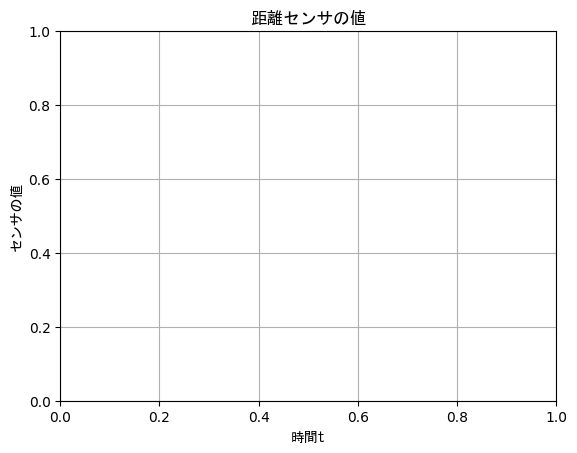

In [6]:
import time
import mujoco
import mujoco.viewer
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

xml = """
<mujoco>
    <default>
        <!-- <joint damping=".03" actuatorforcerange="-0.5 0.5"/> -->
        <default class="wheel">
            <geom type="cylinder" size=".0027 .0007" rgba=".5 .5 1 1" />
        </default>
    </default>

    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.01" />
    <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100" />
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom"
            random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127" />
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8"
            type="2d" width="100" />
        <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60"
            texture="texplane" />
        <material name="geom" texture="texgeom" texuniform="true" />
    </asset>

    <worldbody>

        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <geom conaffinity="1" condim="3" name="floor" friction="0.0 0.0 0.0" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="40 40 40" type="plane"/>


        <body pos="0 0 1">
            <freejoint />
            <site name="sensor_left_front" type="box" size="0.003 0.003 0.003" pos="0.031 0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_left_side" type="box" size="0.003 0.003 0.003" pos="0.043 0.016 0.004" zaxis="0.25 1 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_front" type="box" size="0.003 0.003 0.003" pos="0.031 -0.036 0.004" zaxis="1 0 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_side" type="box" size="0.003 0.003 0.003" pos="0.043 -0.016 0.004" zaxis="0.25 -1 0" rgba=".5 1 .5 1"/>
            <body>
                <geom name="mein_body" type="box" size="0.05 0.04 0.0005" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 .7" pos="0 0 0.001" />
                <site name = "hit_box" type = "box" size = "0.02 0.05 0.0005" pos="0.04 0 0.002" rgba=".5 .2 0 .3"/>
                <site name = "hit_box2" type = "box" size = "0.02 0.05 0.0005" pos="-0.04 0 0.002" rgba=".5 .2 0 .3"/>
            </body>


            <body name="left wheel" pos="-0.0 0.036 0.0135" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" damping="0.002266"/>
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="right wheel" pos="-0.0 -0.036 0.0135" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" damping="0.002266"/>
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" />
                <site type="box" rgba="1 1 1 1" size=".0006 .0036 .0012" />
            </body>

            <body name="motorbox1" pos="0 -0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

            <body name="motorbox2" pos="0 0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" />
            </body>

        </body>
    <!-- <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/> -->



        <body name="wall" pos="7 0.0 0">
                <geom type="box" size="0.1 2 0.3" rgba=".5 .5 1 1" />
            </body>

        <!-- <body name="maze_wall_back" pos="-0.45 0 0.025">
                <geom type="box" size="0.005 0.18 0.025" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="side_wall1" pos="0 3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="side_wall2" pos="0 -3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="maze_init_wall_outline" pos="0 0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" pos="0 -0.18 0.0"/>
          
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.18 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.36 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.54 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.72 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.90 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.08 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.26 0 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="0.81 -0.72 0"/>

                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" />
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.0 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.18 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.36 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.54 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.72 -0.90 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 .3 0.5" pos="-0.09 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="-0.09 -0.72 0"/>
            </body> -->



<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->

        <!-- <body name="maze_wall2" pos="1.9 -0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="long_wall2" pos="1.9 0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body> -->
<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->
            

            <body name="goal1" pos="-2 0 0">
                <geom name="goal" type="sphere" size="0.09" rgba="1 1 0 0.6" />
            </body>
    




    </worldbody>
    <actuator>
        <motor name="right" joint="right wheel joint" gear="0.0185"/>
        <motor name="left" joint="left wheel joint" gear="0.0185"/>
    </actuator>

    <sensor>
        <rangefinder name="LF" site="sensor_left_front" cutoff="0.20"/>
        <rangefinder name="LS" site="sensor_left_side" cutoff="0.20"/>
        <rangefinder name="RF" site="sensor_right_front" cutoff="0.20"/>
        <rangefinder name="RS" site="sensor_right_side" cutoff="0.20"/>
        <touch name = "HB" site = "hit_box"/>
        <touch name = "HB2" site = "hit_box2"/>
    </sensor>
</mujoco>
"""
times = []
left_motor_kakusokudo = []
right_motor_kakusokudo = []
sensor_LF = []
sensor_LS = []
sensor_RF = []
sensor_RS = []
body_vel = []
# m = mujoco.MjModel.from_xml_string(xml) #modelを読み込んで用意
m = mujoco.MjModel.from_xml_path('.\micromouse_straight.xml')#modelを読み込んで用意
# xml_file="micromouse_straight.xml
d = mujoco.MjData(m) #モデルのデータを用意
mujoco.mj_kinematics(m, d)
# print(d.qvel)

with mujoco.viewer.launch_passive(m, d) as viewer: #mujoco描画起動

    # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
    for i in trange(1000):
        d.ctrl = [1,1] #ctrl
        mujoco.mj_step(m, d) # mj_stepでシミュレーションを1進める　　　　　　　mj_stepは、物理シミュレーションをステップする前に、方策を評価し制御信号を適用するコードで置き換えることができます。
        times.append(d.time) #時間の値をリストに格納
        # left_motor_kakusokudo.append(d.qvel[2].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
        # right_motor_kakusokudo.append(d.qvel[1].copy()) #1個目のgeomの0,1,2番目の値つまりZ軸速度を取り出してリストに保存
        # sensor_LF.append(d.sensordata[0].copy()) #センサデータ取得
        # sensor_LS.append(d.sensordata[1].copy()) #センサデータ取得
        # sensor_RF.append(d.sensordata[2].copy()) #センサデータ取得
        # sensor_RS.append(d.sensordata[3].copy()) #センサデータ取得
        body_vel.append(d.qvel[2].copy())
        print
        viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
        # print(d.sensordata[0])
        # print(d.sensordata[1])
        # print(d.sensordata[2])
        # print(d.sensordata[3])


plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("センサの値", fontname="MS Gothic")
plt.grid()
plt.title("距離センサの値", fontname="MS Gothic")
# plt.plot(times, left_motor_kakusokudo, linestyle='solid', marker='s', label="左タイヤの角速度")
# plt.plot(times, right_motor_kakusokudo, linestyle='solid', label="右タイヤの角速度")
plt.plot(times, sensor_LF, linestyle='solid', label="sensor_左前")
# plt.plot(times, sensor_LS, linestyle='solid', label="sensor_左横")
# plt.plot(times, sensor_RF, linestyle='solid', marker='s', label="sensor_右前")
# plt.plot(times, sensor_RS, linestyle='solid', label="sensor_右横")
plt.plot(times, body_vel, linestyle='solid', label="マウス速度")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

# plt.xlabel("時間t", fontname="MS Gothic")
# plt.ylabel("タイヤの角速度", fontname="MS Gothic")
# plt.grid()
# plt.title("z軸向きの速度と角速度変化", fontname="MS Gothic")
# plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き速度")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# # plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度")
# plt.plot(times, cube1_z_angvel, linestyle='solid', marker='s', label="下のブロックのZ軸向き角速度")
# plt.plot(times, cube2_z_angvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き角速度")
# # plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
# plt.legend(prop={'family':'MS Gothic'})
# plt.show()








直進させて速度見る

""

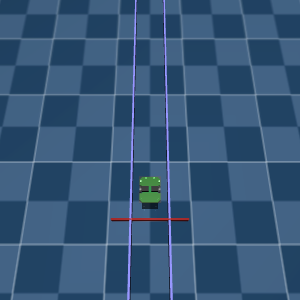

左 1
みぎ 2
qpos= [6.37160896e+00 2.28514537e-14 7.85030267e-04 9.99998418e-01
 1.05639328e-16 1.77876433e-03 1.99633797e-15 5.35790742e+02
 5.35790742e+02]


qpos= [6.37160896e+00 2.28514537e-14 7.85030267e-04 9.99998418e-01
 1.05639328e-16 1.77876433e-03 1.99633797e-15 5.35790742e+02
 5.35790742e+02]


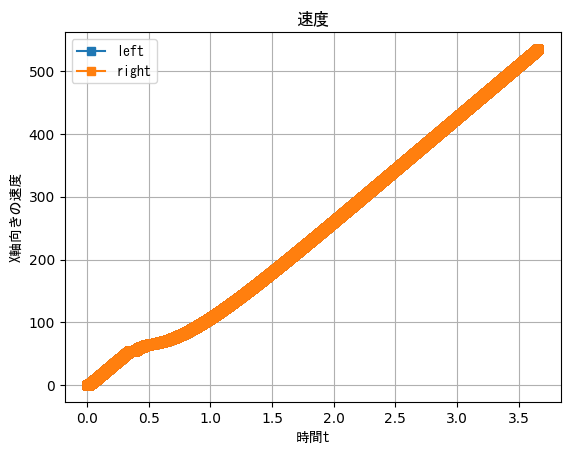

8.148148148148149


In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
    <!-- <default>
        <joint damping=".03" actuatorforcerange="-0.5 0.5"/>
    </default> -->
    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.0001" />

    <asset>
        <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="3072"/>
        <texture type="2d" name="groundplane" builtin="checker" mark="edge" rgb1="0.2 0.3 0.4" rgb2="0.1 0.2 0.3" markrgb="0.8 0.8 0.8" width="300" height="300"/>
        <material name="groundplane" texture="groundplane" texuniform="true" texrepeat="5 5" reflectance="0.2"/>
    </asset>

    <worldbody>
        <!-- <geom type="plane" size="50 50 .01" rgba="0.6 1 0 1" /> -->
        <geom type="plane" size="400 400 .01" material="groundplane"/>
      <light pos="0 0 1.5" dir="0 0 -1" directional="true"/>

        <body pos="0 0 2.8e-1">
            <freejoint/>
            <body name="torso" >
            <geom name="mein_body1" type="box" size="0.05 0.03 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0 0 0.001" mass="4.65e-3"/>
            <geom name="mein_body_chip1" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.04 0.03 0.001" euler="0 0 45" mass="4.65e-3"/>
            <geom name="mein_body_chip2" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.04 -0.03 0.001" euler="0 0 45" mass="4.65e-3"/>
            <geom name="mein_body_chip3" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.04 0.03 0.001" euler="0 0 45" mass="4.65e-3"/>
            <geom name="mein_body_chip4" type="box" size="0.00707 0.00707 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.04 -0.03 0.001" euler="0 0 45" mass="4.65e-3"/>
            <geom name="mein_body4" type="box" size="0.013 0.04 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="-0.027 0 0.001" mass="4.65e-3"/>
            <geom name="mein_body5" type="box" size="0.013 0.04 0.0016" friction="0.0 0.0 0.0" rgba="0.05 0.4 0.15 1" pos="0.027 0 0.001" mass="4.65e-3"/>
                <site name = "hit_box" type = "box" size = "0.02 0.043 0.0016" pos="0.032 0 0.003" rgba=".5 .2 0 .1"/> 接触判定領域（この中に入ってるgeomが接触すると，センサ値としてその値を取得できる）
                <site name = "hit_box2" type = "box" size = "0.02 0.043 0.0016" pos="-0.032 0 0.003" rgba=".5 .2 0 .1"/>
                <camera name="camera_name" mode="track" pos="-0.2 0 1" euler="0 -20 -90" fovy="60"/> トラッキングカメラを装着
            </body>
            
            <site name="sensor_left_front" type="box" size="0.003 0.003 0.003" pos="0.031 0.036 0.01" zaxis="1 0 0.01" rgba=".5 1 .5 1"/>
              <!-- zaxisの３つめ　0.1でちょい上向き -->
            <site name="sensor_left_side" type="box" size="0.003 0.003 0.003" pos="0.043 0.016 0.01" zaxis="0.25 1 0" rgba=".5 1 .5 1"/>
            <site name="sensor_right_front" type="box" size="0.003 0.003 0.003" pos="0.031 -0.036 0.01" zaxis="1 0 0.01" rgba=".5 1 .5 1"/>
            <site name="sensor_right_side" type="box" size="0.003 0.003 0.003" pos="0.043 -0.016 0.01" zaxis="0.25 -1 0" rgba=".5 1 .5 1"/>
            <!-- <site name = "hit_box" type = "box" size = "0.02 0.05 0.0005" pos="0.04 0 0.002" rgba=".5 .2 0 .3"/>
            <site name = "hit_box2" type = "box" size = "0.02 0.05 0.0005" pos="-0.04 0 0.002" rgba=".5 .2 0 .3"/> -->

            <!-- <body name="left wheel" pos="-0.0 0.036 0.0117" zaxis="0 1 0"> -->
             <body name="left wheel" pos="-0.0 0.036 0.0125" zaxis="0 1 0">
                <joint name="left wheel joint" type="hinge" axis="0 0 1" limited="false" damping='5.4e-5' />
                
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" mass="1.0e-2"/>
                <site type="box" size = "0.0012 0.008 0.004" rgba=".5 1 .5 1"/>
            </body>
            
            <body name="right wheel" pos="-0.0 -0.036 0.0125" zaxis="0 1 0">
                <joint name="right wheel joint" type="hinge" axis="0 0 1" limited="false" damping='5.4e-5' />
                <geom type="cylinder" size="0.0135 0.0035" rgba=".3 .3 0.3 1" mass="1.0e-2"/>
                <site type="box" size = "0.0012 0.008 0.004" rgba=".5 1 .5 1"/>
            </body>

            <body name="motorbox1" pos="0 -0.018 0.0135" >
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" mass="5.52e-2"/>
            </body>

            <body name="motorbox2" pos="0 0.018 0.0135">
                <geom type="box" size="0.01 0.0135 0.01" rgba="0.1 0.1 0.1 1" mass="5.52e-2"/>
            </body>

        </body>
    <!-- <site type="box" rgba="1 0 0 0.1" fromto="0 0 0 2 0 0" size="0.01"/>
    <site type="box" rgba="0 1 0 0.1" fromto="0 0 0 0 2 0" size="0.01"/>
    <site type="box" rgba="0 0 1 0.1" fromto="0 0 0 0 0 2" size="0.01"/> --> 座標軸表示



        <!-- <body name="wall" pos="7 0.0 0">
                <geom type="box" size="0.1 2 0.3" rgba=".5 .5 1 1" />
            </body> -->

        <body name="back_wall" pos="-0.09 0 0.025">
                <geom type="box" size="0.005 0.18 0.025" rgba="0.4 0 0 1" />
            </body>
<!-- 
        <body name="side_wall1" pos="0 3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="side_wall2" pos="0 -3 2">
        <freejoint />
                <geom type="box" size="2 0.1 0.3" rgba=".5 .5 1 1" />
            </body> -->
<!-- 
        <body name="maze_init_wall_outline" pos="0 0.09 0.025">
                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" pos="0 -0.18 0.0"/>
          
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.18 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.36 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.54 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.72 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="0.90 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.08 0 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 1" pos="1.26 0 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="0.81 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="0.81 -0.72 0"/>

                <geom type="box" size="0.09 0.005 0.025" rgba=".5 .5 .3 0.5" />
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.0 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.18 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.36 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.54 -0.90 0"/>
                <geom type="box" size="0.09 0.005 0.025" rgba="1 0 0 0.4" pos="0.72 -0.90 0"/>

                <geom type="box" size="0.005 0.09 0.025" rgba=".5 .5 .3 0.5" pos="-0.09 -0.09 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.18 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.36 0"/>
                <geom type="box" size="0.005 0.09 0.025" rgba="1 0 0 1" pos="-0.09 -0.54 0"/>
                <geom type="box" size="0.005 0.18 0.025" rgba="1 0 0 1" pos="-0.09 -0.72 0"/>
            </body> -->



<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->

        <body name="maze_wall2" pos="1.9 -0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
            <body name="long_wall2" pos="1.9 0.09 0.025">
                <geom type="box" size="8 0.005 0.025" rgba=".5 .5 1 1" />
            </body>
<!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ --><!-- かべかべかべｎ -->
            

            <body name="goal1" pos="2 0 0.045">
                <site name="goal2" type="sphere" size="0.03" rgba="1 1 0 1" />
                <site name="goal3" type="sphere" size="0.1" rgba="0 1 0.2 0.2" />
            </body>
     




    </worldbody>
    <actuator>
        <!-- <motor name="right" joint="right wheel joint" gear="1.8e-3" ctrllimited="true" ctrlrange="-3 3"/> ctrlrangeで入力の値の範囲を決められる
        <motor name="left" joint="left wheel joint" gear="1.8e-3" ctrllimited="true" ctrlrange="-3 3"/> -->
        <motor name="right" joint="right wheel joint" gear="0.3e-2" ctrllimited="true" ctrlrange="-3 3"/> ctrlrangeで入力の値の範囲を決められる
        <motor name="left" joint="left wheel joint" gear="0.3e-2" ctrllimited="true" ctrlrange="-3 3"/>
    </actuator>

    <sensor>
        <rangefinder name="LF" site="sensor_left_front" cutoff="0.10"/>
        <rangefinder name="LS" site="sensor_left_side" cutoff="0.10"/>
        <rangefinder name="RF" site="sensor_right_front" cutoff="0.10"/>
        <rangefinder name="RS" site="sensor_right_side" cutoff="0.10"/>
        <touch name = "HB" site = "hit_box"/>
        <touch name = "HB2" site = "hit_box2"/>
    </sensor>
</mujoco>
"""
mouse_xvel = []
mouse_xvel2 = []
left_ang = []
right_ang = []
# cube2_zvel = []
# cube2_greenball_zvel = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "camera_name")
media.show_image(renderer.render())
left_id = mujoco.mj_name2id(model, 3,'left wheel joint') #この第二引数の，typeを入力する必要があるんだけどどんな値入れてるのか本当にわからない　そしてこれだと物体の重心位置をとってしまう
right_id = mujoco.mj_name2id(model, 3,'right wheel joint') #この第二引数の，typeを入力する必要があるんだけどどんな値入れてるのか本当にわからない　そしてこれだと物体の重心位置をとってしまう
print("左",left_id)
print("みぎ",right_id)

# simulate and render
for i in range(440):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    data.ctrl = [3,3]
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    mouse_xvel.append(data.qvel[0].copy())
    mouse_xvel2.append(data.qvel[1].copy())
    left_ang.append(data.qpos[7].copy())
    right_ang.append(data.qpos[8].copy())
    # cube2_greenball_zvel.append(data.[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,"camera_name")
  frame = renderer.render()
  frames.append(frame)
print("qpos=", data.qpos)

for u in range(440):
  while data.time < u/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    data.ctrl = [-0.3,-0.3]
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    mouse_xvel.append(data.qvel[0].copy())
    mouse_xvel2.append(data.qvel[1].copy())
    left_ang.append(data.qpos[7].copy())
    right_ang.append(data.qpos[8].copy())
    # cube2_greenball_zvel.append(data.[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,"camera_name")
  frame = renderer.render()
  frames.append(frame)
  print("qpos=", data.qpos)
  


# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=120)

print("qpos=", data.qpos)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("X軸向きの速度", fontname="MS Gothic")
plt.grid()
plt.title("速度", fontname="MS Gothic")
plt.plot(times, left_ang, linestyle='solid', marker='s', label="left")
plt.plot(times, right_ang, linestyle='solid', marker='s', label="right")
# plt.plot(times, mouse_xvel2, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度(相対?)")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

# ω　＝　ｖ/ｒより，
omega = 0.11 / 0.0135
print(omega)

# name2idはfreejointの6つのジョイントを１つと換算してしまう！？！？！？！？！から相性が悪い！！

# 強化学習
### まずは抽象クラスを作成する．
抽象クラスとは，インスタンスとしては使わず，後のクラスの定義をするときにこれを継承して作ることで楽に作れるように毎回共通してる処理など必要な処理をまとめてるクラスのこと

In [ ]:
import numpy as np
class coreEnv:
    def __init__(self):
        

# 番外編

In [1]:
import random
import time

def shuffle_names(names):
    random.shuffle(names)
    return names

#15人の名前のリスト
names_list = ["森岡君", "廣島君", "有川君", "井上君", "森永君", "川田君", "玉村さん", "橋口さん", "池岡さん", "水野君","青木君", "西本君", "佐藤君"]

#ランダムに並び替えた名前のリストを取得
shuffled_names = shuffle_names(names_list)

print(3)
time.sleep(1)
print(2)
time.sleep(1)
print(1)
time.sleep(1)

n = 0
#結果の出力
print("今日の発表順番は:")
for name in shuffled_names:
    n += 1
    print(n,":",name)

3
2
1
今日の発表順番は:
1 : 池岡さん
2 : 井上君
3 : 西本君
4 : 森永君
5 : 川田君
6 : 玉村さん
7 : 水野君
8 : 廣島君
9 : 橋口さん
10 : 森岡君
11 : 佐藤君
12 : 青木君
13 : 有川君


In [ ]:
import random
import time

def shuffle_names(names):
    random.shuffle(names)
    return names

#みんなの名前のリスト
names_list = ["森岡", "廣島", "有川", "井上", "森永", "川田", "玉村", "橋口", "池岡", "水野","青木", "西本", "佐藤", "渋谷"]

#名前のリストをランダムに並び替えたものを用意
shuffled_names = shuffle_names(names_list)

print(3)
time.sleep(1)
print(2)
time.sleep(1)
print(1)
time.sleep(1)

n = 0
#結果の出力
print("今日の発表順番は:")
for name in shuffled_names: #ランダムの名前リストから順に表示
    n += 1
    print(n,":",name)

In [1]:
import time

import mujoco
import mujoco.viewer

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

paused = False
def key_callback(keycode):
  if chr(keycode) == ' ':
    global paused
    paused = not paused

#Create model
model = mujoco.MjModel.from_xml_path('mouse_in_maze.xml')
data = mujoco.MjData(model)

gear = 0.3e-2
wheel_r = 0.0135

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

#Main Loop
now = 0.0
past = 0.0
turn_flag = 0
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer:
  while viewer.is_running():
    if not paused:
      lf, ls, rs, rf = get_distance(model, data)
      ax, ay, az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      #Control
      err = ls - rs
      velocity = 0.05
      k= 0.6
      if turn_flag==1 or (lf<0.05 and rf <0.05):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
        #print('Turn')
      else:
        right_mot = velocity + k * err
        left_mot =  velocity - k * err
        #print('Foward')

      #Move
      action(model, data, left_mot, right_mot)

      #Simulation
      mujoco.mj_step(model, data)
      
      #Vizualize
      now = data.time
      if now-past>0.01:
        past = now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        print(now,\
              data.actuator('right').length[0],   data.actuator('left').length[0],\
              data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
              ax, ay, az, gx, gy, gz)
      

KeyError: "Invalid name 'Accel'. Valid names: ['HB', 'HB2', 'LF', 'LS', 'RF', 'RS']"